Unsuprvised learning

In [13]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [14]:
df = spark.read.csv("data/population.csv",inferSchema=True,header=True)
df.show(10)

+---+------+------+------+
|_c0|height|weight|gender|
+---+------+------+------+
|  0|   124|    71|  Male|
|  1|   198|    53|Female|
|  2|   197|    57|Female|
|  3|   188|    61|Female|
|  4|   134|    88|  Male|
|  5|   112|    85|  Male|
|  6|   197|    64|Female|
|  7|   130|    94|  Male|
|  8|   203|    56|Female|
|  9|   139|    85|  Male|
+---+------+------+------+
only showing top 10 rows



In [15]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: integer (nullable = true)
 |-- gender: string (nullable = true)



In [16]:
df.columns

['_c0', 'height', 'weight', 'gender']

In [17]:
from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCol='gender',outputCol='gender_id')
indexed=indexer.fit(df).transform(df)

In [18]:
from pyspark.ml.feature import VectorAssembler
assembler=VectorAssembler(inputCols=[
    'height',
    'weight'],outputCol='features')
output=assembler.transform(indexed)
output.select('features','gender_id').show(5)

+------------+---------+
|    features|gender_id|
+------------+---------+
|[124.0,71.0]|      1.0|
|[198.0,53.0]|      0.0|
|[197.0,57.0]|      0.0|
|[188.0,61.0]|      0.0|
|[134.0,88.0]|      1.0|
+------------+---------+
only showing top 5 rows



In [19]:
from pyspark.ml.feature import Normalizer

normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)
l1NormData = normalizer.transform(output)
l1NormData.show()

+---+------+------+------+---------+------------+--------------------+
|_c0|height|weight|gender|gender_id|    features|       features_norm|
+---+------+------+------+---------+------------+--------------------+
|  0|   124|    71|  Male|      1.0|[124.0,71.0]|[0.63589743589743...|
|  1|   198|    53|Female|      0.0|[198.0,53.0]|[0.78884462151394...|
|  2|   197|    57|Female|      0.0|[197.0,57.0]|[0.77559055118110...|
|  3|   188|    61|Female|      0.0|[188.0,61.0]|[0.75502008032128...|
|  4|   134|    88|  Male|      1.0|[134.0,88.0]|[0.60360360360360...|
|  5|   112|    85|  Male|      1.0|[112.0,85.0]|[0.56852791878172...|
|  6|   197|    64|Female|      0.0|[197.0,64.0]|[0.75478927203065...|
|  7|   130|    94|  Male|      1.0|[130.0,94.0]|[0.58035714285714...|
|  8|   203|    56|Female|      0.0|[203.0,56.0]|[0.78378378378378...|
|  9|   139|    85|  Male|      1.0|[139.0,85.0]|[0.62053571428571...|
| 10|   197|    59|Female|      0.0|[197.0,59.0]|[0.76953125,0.230...|
| 11| 

In [20]:
(train, test) = l1NormData.randomSplit([0.7, 0.3])
train.show()

+---+------+------+------+---------+------------+--------------------+
|_c0|height|weight|gender|gender_id|    features|       features_norm|
+---+------+------+------+---------+------------+--------------------+
|  0|   124|    71|  Male|      1.0|[124.0,71.0]|[0.63589743589743...|
|  1|   198|    53|Female|      0.0|[198.0,53.0]|[0.78884462151394...|
|  2|   197|    57|Female|      0.0|[197.0,57.0]|[0.77559055118110...|
|  3|   188|    61|Female|      0.0|[188.0,61.0]|[0.75502008032128...|
|  5|   112|    85|  Male|      1.0|[112.0,85.0]|[0.56852791878172...|
|  6|   197|    64|Female|      0.0|[197.0,64.0]|[0.75478927203065...|
|  8|   203|    56|Female|      0.0|[203.0,56.0]|[0.78378378378378...|
|  9|   139|    85|  Male|      1.0|[139.0,85.0]|[0.62053571428571...|
| 10|   197|    59|Female|      0.0|[197.0,59.0]|[0.76953125,0.230...|
| 11|   196|    55|Female|      0.0|[196.0,55.0]|[0.78087649402390...|
| 13|   113|    64|  Male|      1.0|[113.0,64.0]|[0.63841807909604...|
| 14| 

In [21]:
test.show()

+---+------+------+------+---------+-------------+--------------------+
|_c0|height|weight|gender|gender_id|     features|       features_norm|
+---+------+------+------+---------+-------------+--------------------+
|  4|   134|    88|  Male|      1.0| [134.0,88.0]|[0.60360360360360...|
|  7|   130|    94|  Male|      1.0| [130.0,94.0]|[0.58035714285714...|
| 12|   128|    90|  Male|      1.0| [128.0,90.0]|[0.58715596330275...|
| 16|   184|    49|Female|      0.0| [184.0,49.0]|[0.78969957081545...|
| 22|   132|   104|  Male|      1.0|[132.0,104.0]|[0.55932203389830...|
| 25|   196|    71|Female|      0.0| [196.0,71.0]|[0.73408239700374...|
| 30|   184|    60|Female|      0.0| [184.0,60.0]|[0.75409836065573...|
| 36|   194|    68|Female|      0.0| [194.0,68.0]|[0.74045801526717...|
| 43|   128|    88|  Male|      1.0| [128.0,88.0]|[0.59259259259259...|
| 45|   143|    86|  Male|      1.0| [143.0,86.0]|[0.62445414847161...|
| 49|   195|    61|Female|      0.0| [195.0,61.0]|[0.76171875,0.

In [22]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_scores=[]
evaluator = ClusteringEvaluator(featuresCol='features', metricName='silhouette', distanceMeasure='squaredEuclidean')

for K in range(2,11):

    KMeans_=KMeans(featuresCol='features', k=K)

    KMeans_fit=KMeans_.fit(train)

    KMeans_transform=KMeans_fit.transform(train)

    evaluation_score=evaluator.evaluate(KMeans_transform)

    silhouette_scores.append(evaluation_score)


Text(0, 0.5, 'Silhouette Score')

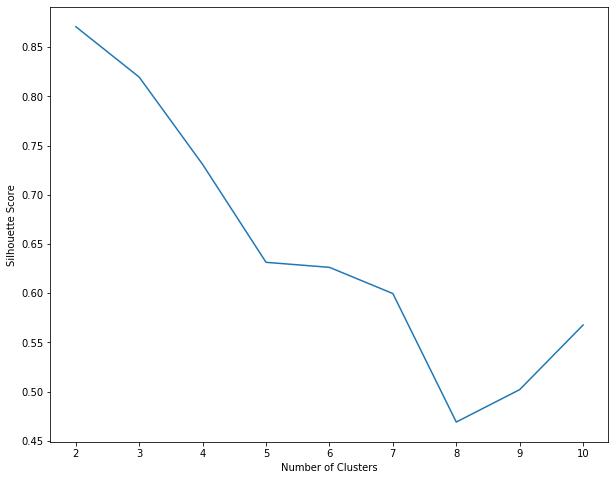

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(10,8))
ax.plot(range(2,11),silhouette_scores)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')

In [24]:
KMeans_=KMeans(featuresCol='features', k=2)
KMeans_Model=KMeans_.fit(train)
prediction=KMeans_Model.transform(test)
prediction.show()

+---+------+------+------+---------+-------------+--------------------+----------+
|_c0|height|weight|gender|gender_id|     features|       features_norm|prediction|
+---+------+------+------+---------+-------------+--------------------+----------+
|  4|   134|    88|  Male|      1.0| [134.0,88.0]|[0.60360360360360...|         1|
|  7|   130|    94|  Male|      1.0| [130.0,94.0]|[0.58035714285714...|         1|
| 12|   128|    90|  Male|      1.0| [128.0,90.0]|[0.58715596330275...|         1|
| 16|   184|    49|Female|      0.0| [184.0,49.0]|[0.78969957081545...|         0|
| 22|   132|   104|  Male|      1.0|[132.0,104.0]|[0.55932203389830...|         1|
| 25|   196|    71|Female|      0.0| [196.0,71.0]|[0.73408239700374...|         0|
| 30|   184|    60|Female|      0.0| [184.0,60.0]|[0.75409836065573...|         0|
| 36|   194|    68|Female|      0.0| [194.0,68.0]|[0.74045801526717...|         0|
| 43|   128|    88|  Male|      1.0| [128.0,88.0]|[0.59259259259259...|         1|
| 45